In [4]:

import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import sklearn

print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(seaborn.__version__))
print('Scipy: {}'.format(scipy.__version__))
print('Sklearn: {}'.format(sklearn.__version__))

Python: 3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]
Numpy: 1.15.4
Pandas: 0.23.4
Matplotlib: 3.0.2
Seaborn: 0.9.0
Scipy: 1.1.0
Sklearn: 0.20.1


In [5]:
#import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#load the csv dataset using pandas
data =pd.read_csv('creditcard.csv')

In [7]:
#exploring the dataset
#view all the variables and datatype of the dataset
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [8]:
#to see the total number of observation and variables
print(data.shape)

(284807, 31)


In [8]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

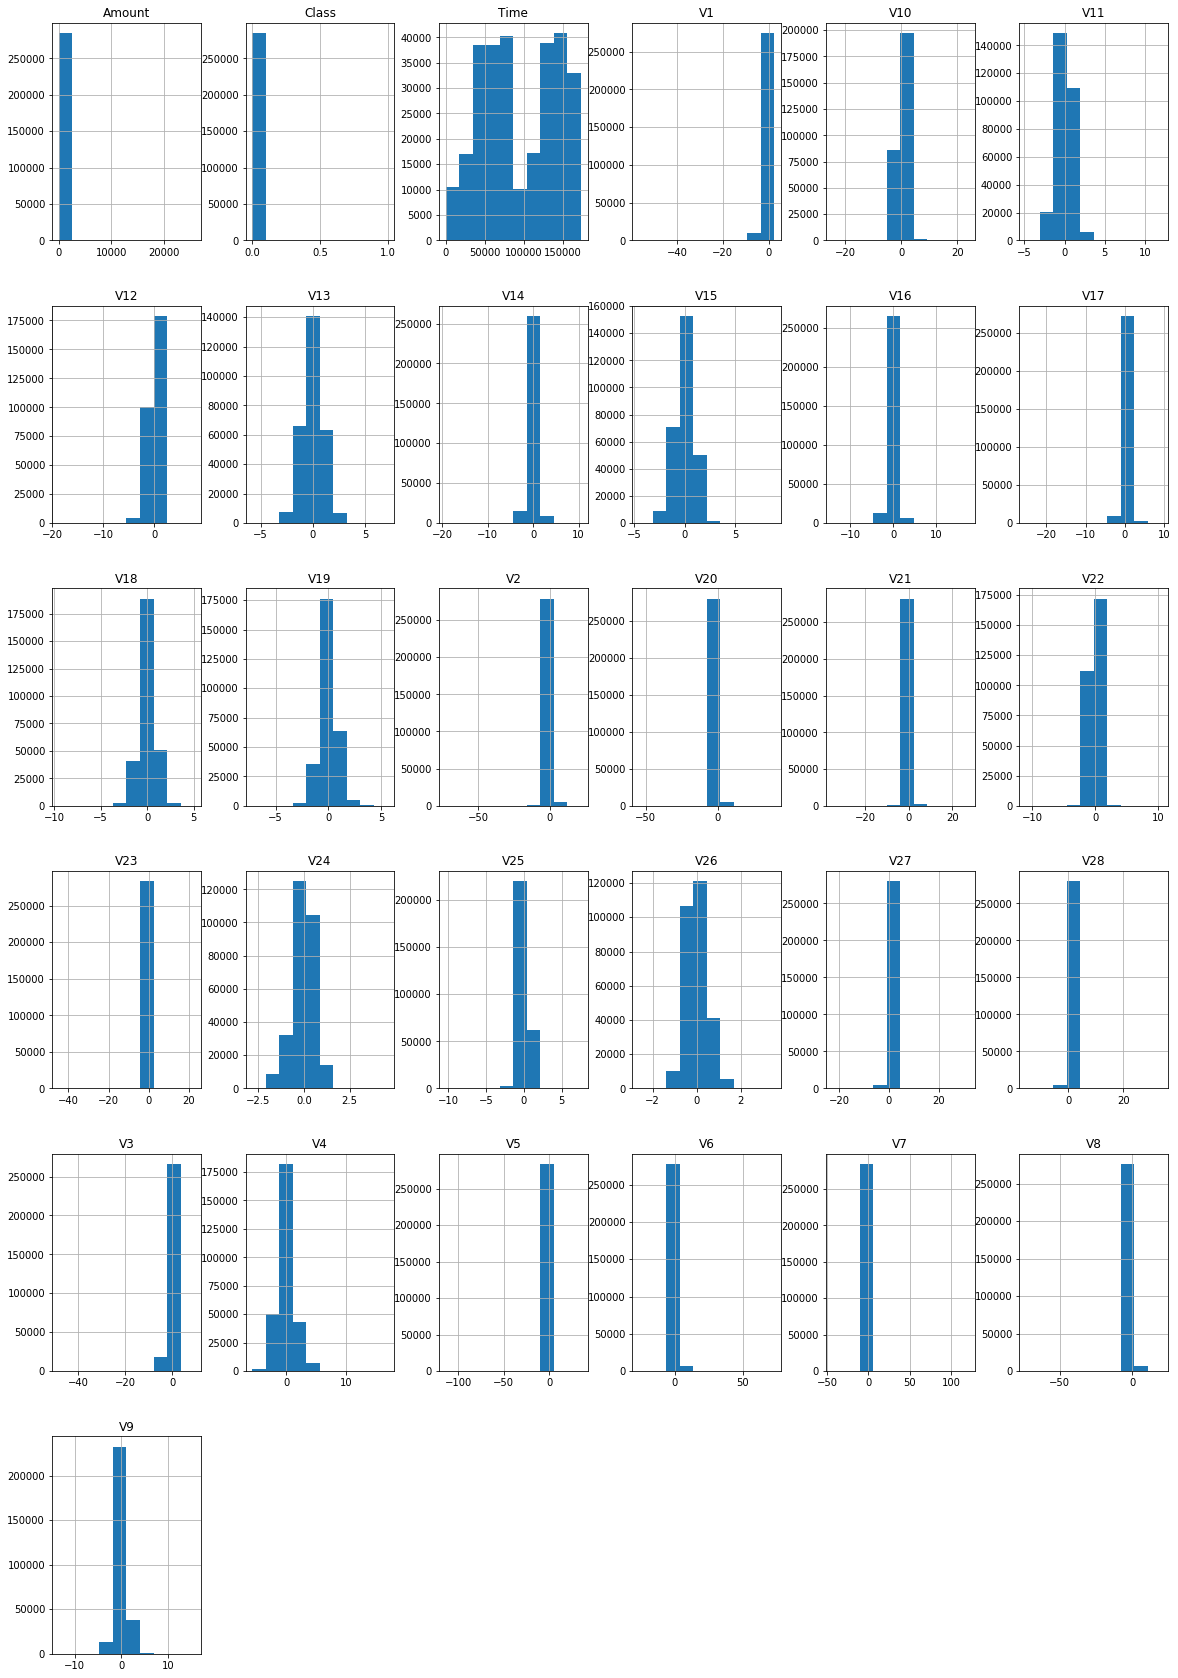

In [9]:
#histogram plot of each parameter
data.hist(figsize = (20,30))
plt.show()

In [10]:
#determine the number of fraud cases in dataset
fraud=data[data['Class']==1]
valid =data[data['Class'] == 0]

outlier_fraction = len(fraud)/float(len(valid))
print(outlier_fraction)

print('fraud cases: {}'.format(len(fraud)))
print('valid cases: {}'.format(len(valid)))

0.0017304750013189597
fraud cases: 492
valid cases: 284315


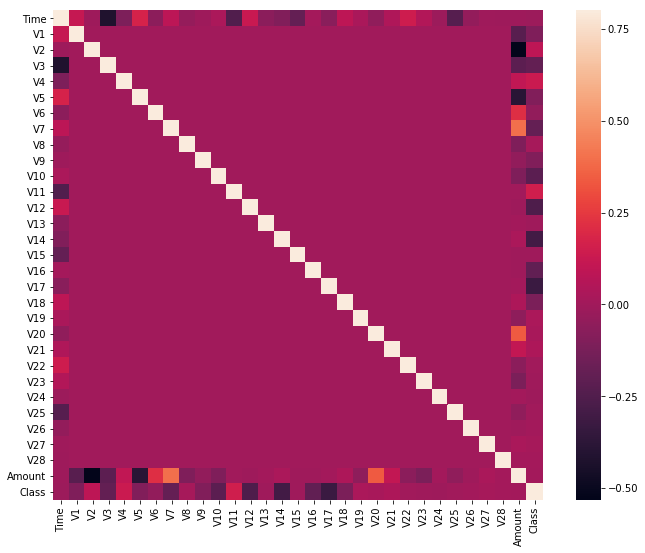

In [11]:
#correlation matrix 
corrmat =data.corr()
fig = plt.figure(figsize = (12,9))

sns.heatmap(corrmat, vmax =.8 ,square = True)
plt.show()

In [12]:
#get columns from the dataframe
columns =data.columns.tolist()

#filter the colums to remove data we do not want
columns = [c for c in columns if c not in ['class']]

#store the variable we'll be predicting on
target = "Class"

x =data[columns]
y= data[target]

#print the shapes of x and y
print(x.shape)
print(y.shape)

(284807, 31)
(284807,)


In [13]:
#import the packages from sklearn

from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

#define a random state
state=1

#define the outlier detection methods
classifiers = {
    "Isolation Forest": IsolationForest(max_samples = len(x),
                                     contamination = outlier_fraction,
                                       random_state =state),
    "Local Outlier Factor":LocalOutlierFactor(
    n_neighbors = 20,
    contamination = outlier_fraction)
}

In [14]:
#fit the model
n_outliers = len(fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    #fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(x)
        score_pred = clf.negative_outlier_factor_
    else:
        clf.fit(x)
        scores_pred = clf.decision_function(x)
        y_pred = clf.predict(x)
        
    #reshape the prediction values to 0 for world, 1 for fraud
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != y).sum()
    
    # run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(y, y_pred))
    print(classification_report(y, y_pred))

C:\Users\OCHANYA\Anaconda\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\OCHANYA\Anaconda\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Isolation Forest: 571
0.9979951335465772
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.42      0.42      0.42       492

   micro avg       1.00      1.00      1.00    284807
   macro avg       0.71      0.71      0.71    284807
weighted avg       1.00      1.00      1.00    284807

Local Outlier Factor: 935
0.9967170750718908
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.05      0.05      0.05       492

   micro avg       1.00      1.00      1.00    284807
   macro avg       0.52      0.52      0.52    284807
weighted avg       1.00      1.00      1.00    284807

